In [5]:
import pickle

# Replace with the path to your graph.pickle
filename = 'outputs/openai/gemini-2.0-flash_nvidia_NV-Embed-v2/graph.pickle'

# Load the graph object
with open(filename, 'rb') as file:
    graph = pickle.load(file)

# Now you can use `graph` as a normal Python object
print(type(graph))

<class 'igraph.Graph'>


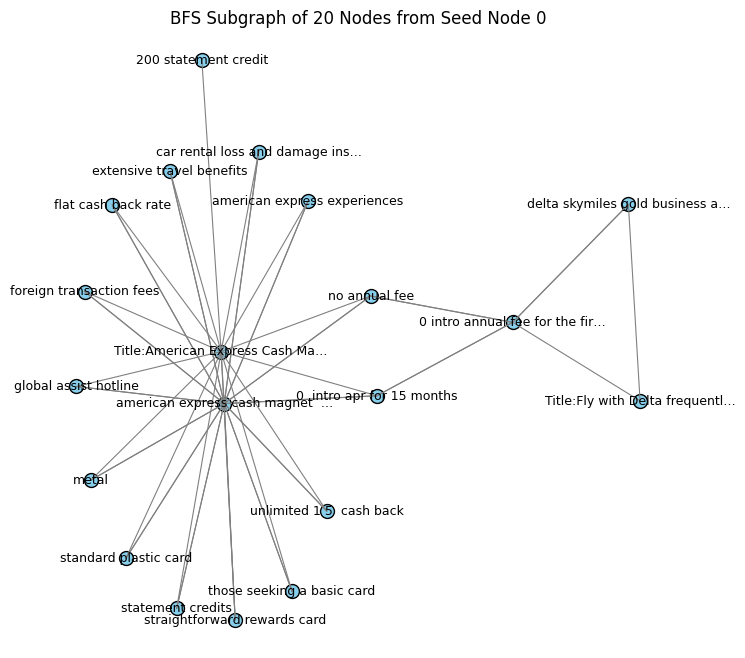

In [17]:
import matplotlib.pyplot as plt
from collections import deque

# --- Choose a seed node (by index or name) ---
seed_index = 0  # You can change this to any node index you want
target_node_count = 20

# --- BFS to collect connected nodes ---
visited = set()
queue = deque([seed_index])
bfs_nodes = []

while queue and len(bfs_nodes) < target_node_count:
    current = queue.popleft()
    if current not in visited:
        visited.add(current)
        bfs_nodes.append(current)
        neighbors = graph.neighbors(current, mode="ALL")
        queue.extend(neigh for neigh in neighbors if neigh not in visited)

# --- Create subgraph from collected nodes ---
subgraph = graph.subgraph(bfs_nodes)

# --- Plotting ---
layout = subgraph.layout("kk")
coords = [layout[i] for i in range(subgraph.vcount())]

plt.figure(figsize=(8, 8))

# Draw edges
for edge in subgraph.get_edgelist():
    x0, y0 = coords[edge[0]]
    x1, y1 = coords[edge[1]]
    plt.plot([x0, x1], [y0, y1], 'gray', linewidth=0.8)

# Draw nodes
x_vals, y_vals = zip(*coords)
plt.scatter(x_vals, y_vals, s=100, color='skyblue', edgecolors='black')

# Draw labels if available
if "name" in subgraph.vs.attributes():
    label_attr = "content" if "content" in subgraph.vs.attributes() else "name"
    for i, label in enumerate(subgraph.vs[label_attr]):
        truncated = label[:30] + "…" if len(label) > 30 else label
        x, y = coords[i]
        plt.text(x, y, truncated, fontsize=9, ha='center', va='center')

plt.axis("off")
plt.title(f"BFS Subgraph of {len(bfs_nodes)} Nodes from Seed Node {seed_index}")
plt.show()
